<a href="https://colab.research.google.com/github/SarvAster/GNN-KN-TRANSFORMER/blob/main/karate_club_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade networkx
!pip install scipy==1.13.0
import networkx as nx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
# Graph
G = nx.Graph()
H = nx.DiGraph()
print(G.is_directed())
print(H.is_directed())
G.graph["graph_level_attribute"] = "graph_style"
print(G.graph)

False
True
{'graph_level_attribute': 'graph_style'}


In [ ]:
# Node
G.add_node(0, feature=5, label=1, any=2) # cannot take more than three attributes. Node can be a string, a graph, a tuple, etc
print(G.nodes)
node_0_attr = G.nodes[0]
print(node_0_attr)
G.add_node((2,3), lol="no")
G.add_nodes_from([
  (1, {"loe": 1, "rer": 1}),
  (2, {"cal": 2, "re": 2})
])
print(G.nodes)
print(G.nodes[1])
G.nodes(data=True)
print(G)
print(G[1])

[0]
{'feature': 5, 'label': 1, 'any': 2}
[0, (2, 3), 1, 2]
{'loe': 1, 'rer': 1}
Graph with 4 nodes and 0 edges
{}


In [ ]:
# Edges
G.add_edge(0,1, weight=1)
print(G.edges[(0,1)])
G.add_edges_from([(0,2, {"weight":1}),(1,2, {"weight":2})])
for edge in G.edges:
  print(edge)
G.add_node(G, larer="cke")
e=[G,(2,3)]
G.add_edge(*e)
print(e)
print(G[G])

{'weight': 1}
(0, 1)
(0, 2)
(1, 2)
[<networkx.classes.graph.Graph object at 0x799a2a95d630>, (2, 3)]
{(2, 3): {}}


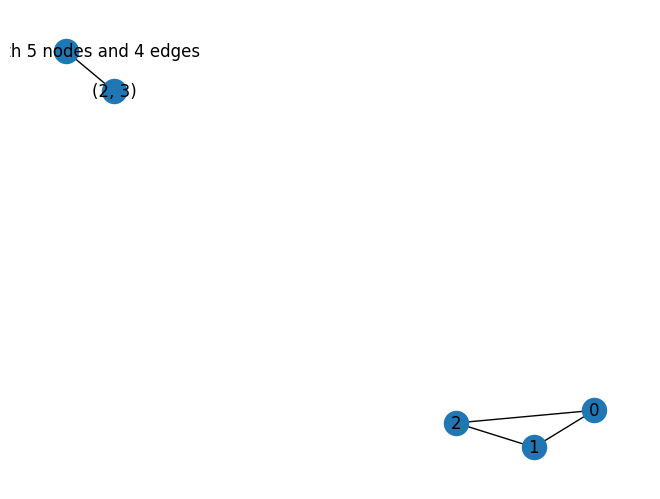

In [ ]:
nx.draw(G, with_labels = True)

In [ ]:
for node in G.nodes:
  print("node {} has degree {}".format(node, G.degree[node]))
for neighbor in G.neighbors(1):
  print("Node has neighbor {}".format(neighbor))

node 0 has degree 2
node (2, 3) has degree 1
node 1 has degree 2
node 2 has degree 2
node Graph with 5 nodes and 4 edges has degree 1
Node has neighbor 0
Node has neighbor 2


{0: 0.09599418912353194,
 1: 0.16855583944001085,
 2: 0.15797477280488698,
 3: 0.1549503972631401,
 4: 0.15797477280488698,
 5: 0.16855583944001085,
 6: 0.09599418912353194}

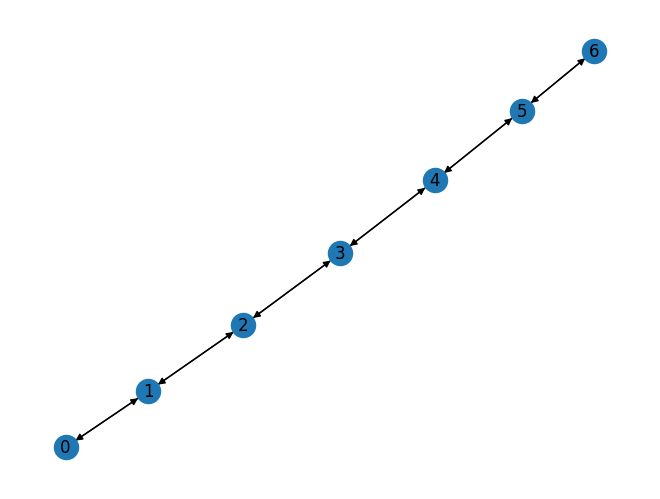

In [ ]:
J = nx.DiGraph(nx.path_graph(7))
nx.draw(J, with_labels=True)
nx.pagerank(J, alpha=0.8)

In [ ]:
# Pytorch Geometric
import torch
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!pip install -q torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.8 MB/s eta 0:00:00


In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]
print(data)
print(data.is_undirected())

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4
Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
True


In [ ]:
print(data.num_edges)
print(data.num_nodes)
print(data.num_node_features)
print(data.num_edge_features)
print(data.has_isolated_nodes())
print(data.has_self_loops())
print(data.is_directed())
print(data.train_mask.sum())

156
34
34
0
False
False
False
tensor(4)


In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index)
print(edge_index.t())
print(data.y)

<IPython.core.display.Javascript object>

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4

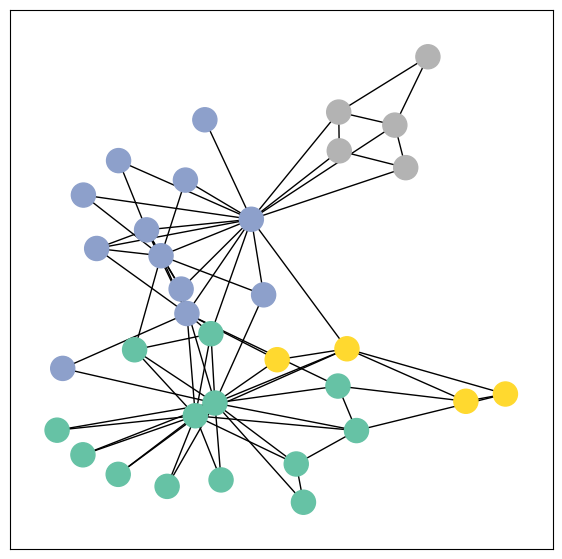

In [ ]:
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

G = to_networkx(data,to_undirected = True)
visualize(G, color=data.y)

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)



GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


tensor([[-0.2119,  4.6967, -4.7912,  0.1434],
        [ 1.3885,  3.1109, -3.2604, -1.4424],
        [ 4.6426, -0.1601, -0.0930, -4.6592],
        [ 1.1229,  3.3741, -3.5146, -1.1792],
        [-4.2185,  0.8377,  0.5881,  5.3902],
        [-4.2507,  0.8373,  0.5953,  5.4274],
        [-4.2507,  0.8373,  0.5954,  5.4274],
        [ 2.0975,  2.3756, -2.5436, -2.1396],
        [ 4.6600, -0.2190, -0.0273, -4.6696],
        [ 4.6206, -0.2710,  0.0422, -4.6158],
        [-4.2188,  0.8374,  0.5885,  5.3906],
        [-0.0504,  3.8003, -3.7704,  0.1035],
        [ 0.5338,  3.8497, -3.9508, -0.5778],
        [ 3.5618,  0.9045, -1.1193, -3.5872],
        [ 4.5913, -0.3378,  0.1269, -4.5710],
        [ 4.5889, -0.3402,  0.1303, -4.5679],
        [-4.2460,  0.8277,  0.6057,  5.4235],
        [ 0.7787,  3.6100, -3.7200, -0.8209],
        [ 4.5861, -0.3452,  0.1367, -4.5638],
        [ 3.2634,  1.1293, -1.3214, -3.2800],
        [ 4.5718, -0.3570,  0.1535, -4.5455],
        [ 0.8693,  3.5377, -3.6539

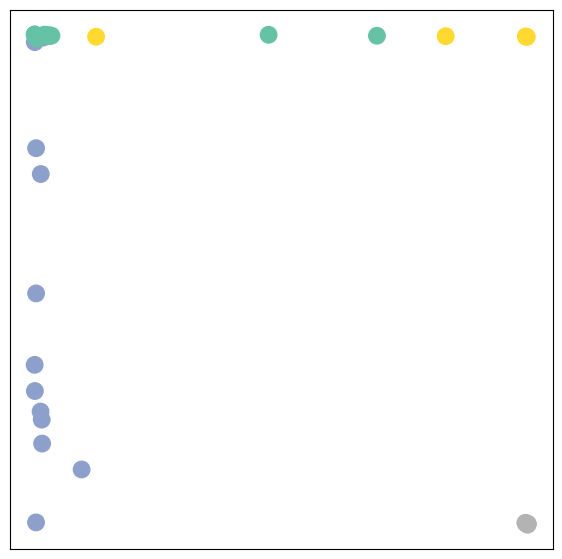

In [ ]:
u , h = model(data.x,data.edge_index)
print(u)
#print(h)
visualize(h,color=data.y)

<IPython.core.display.Javascript object>

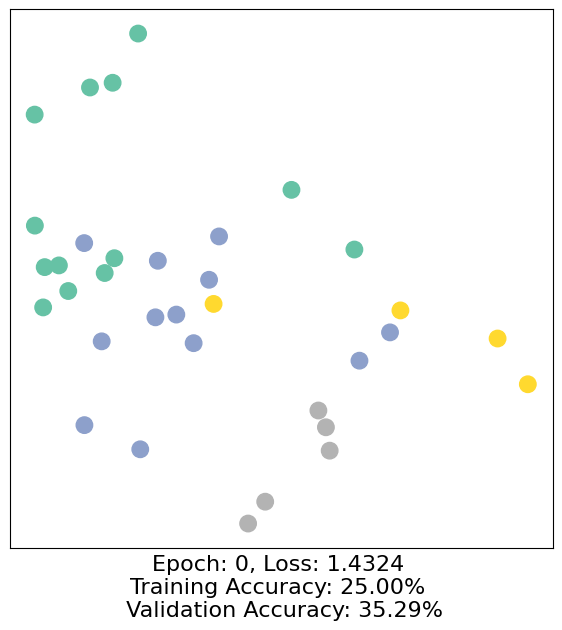

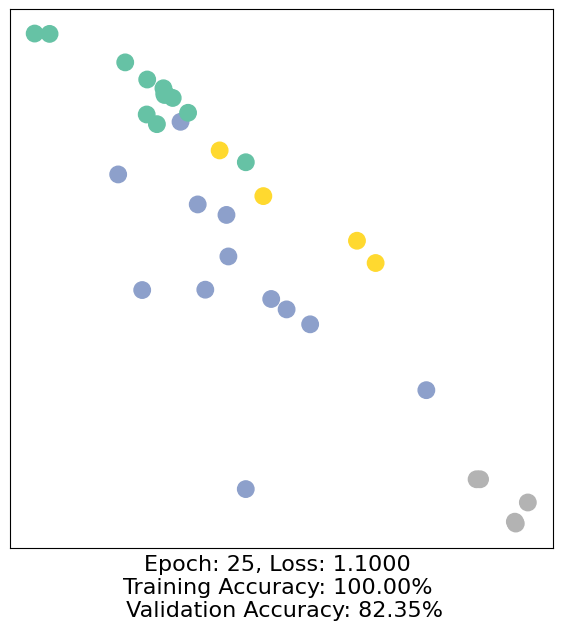

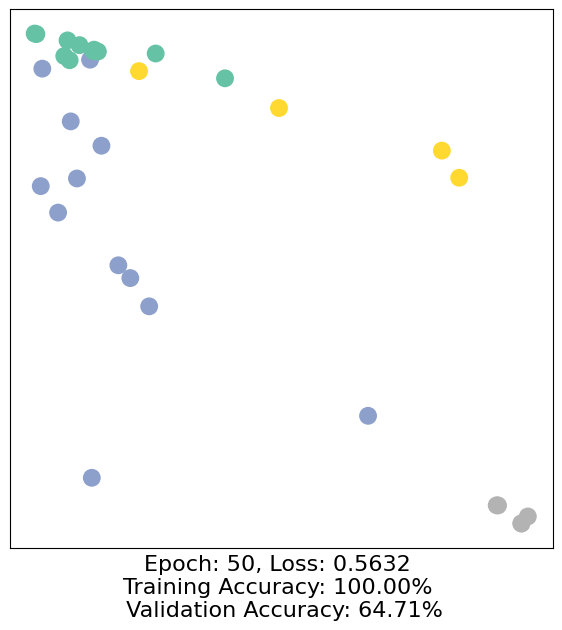

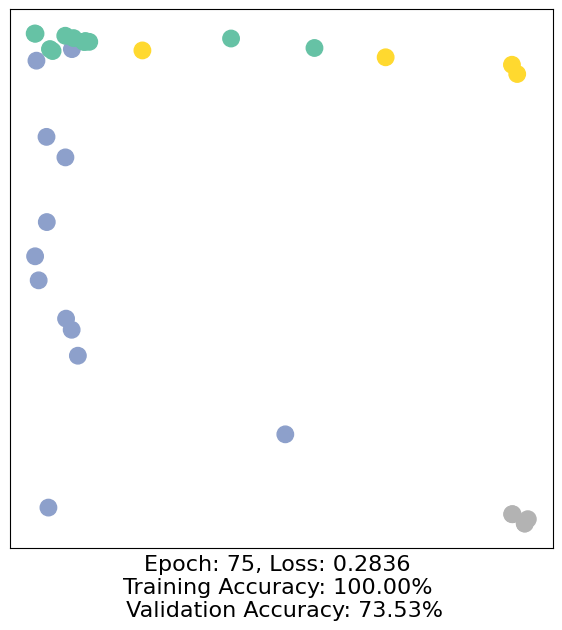

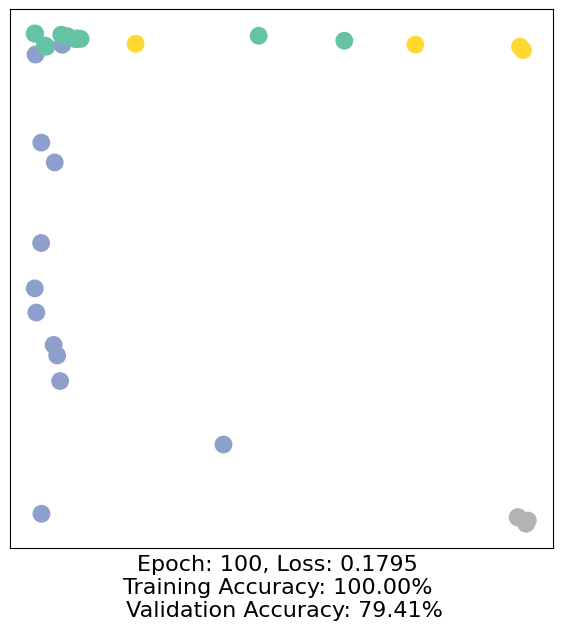

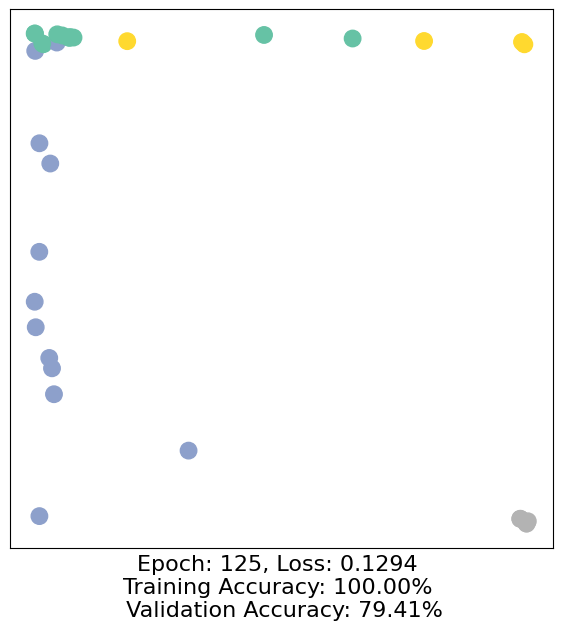

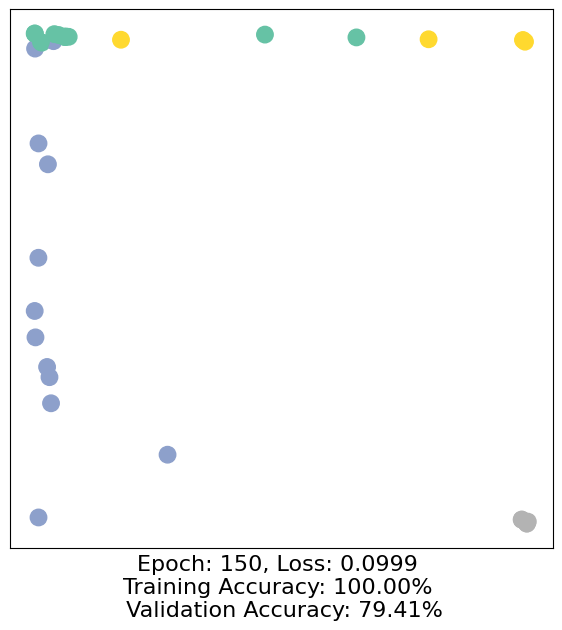

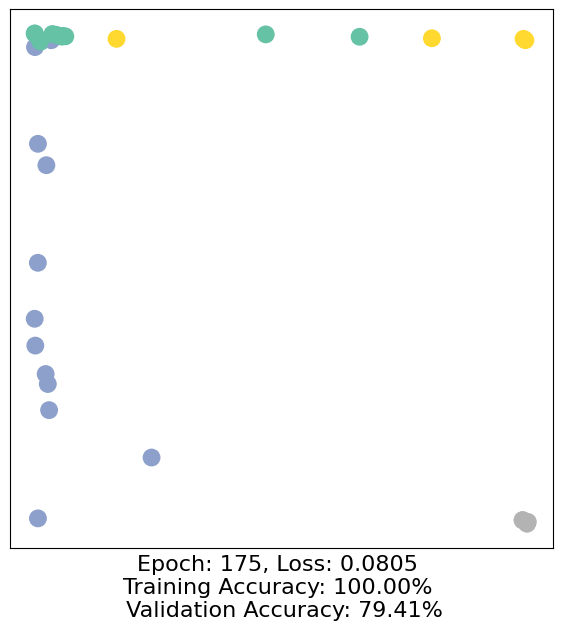

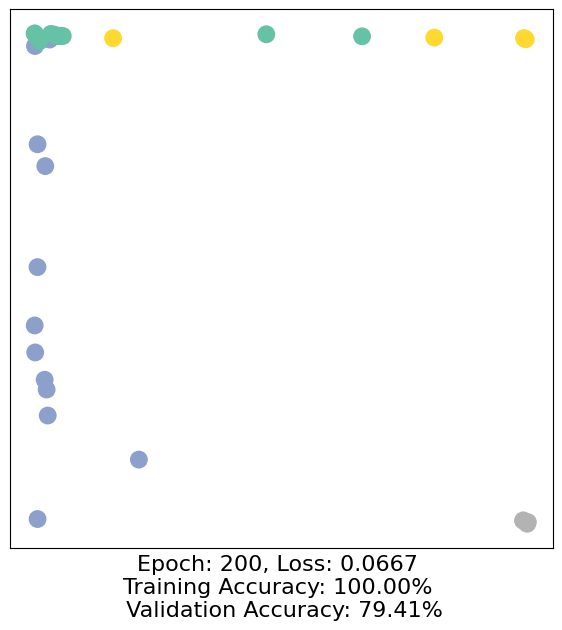

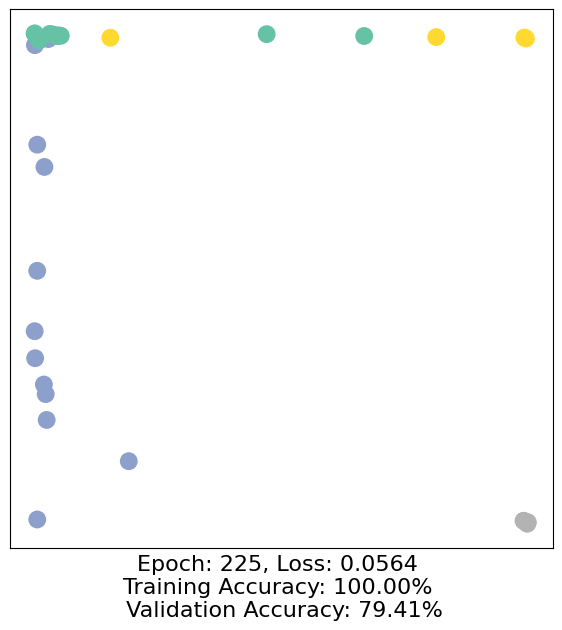

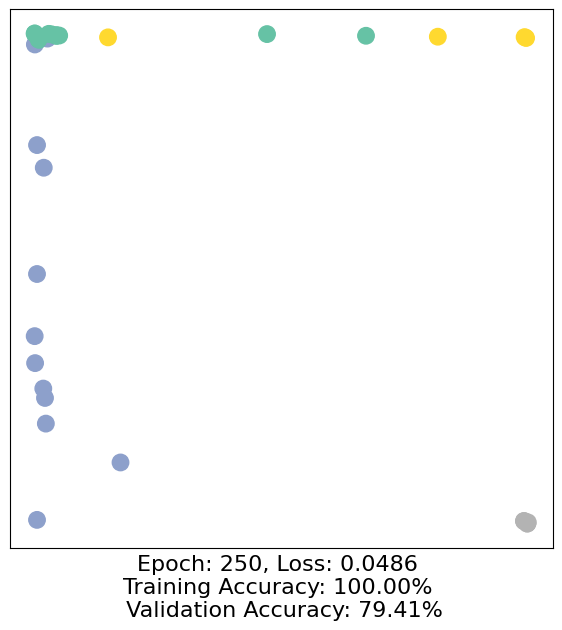

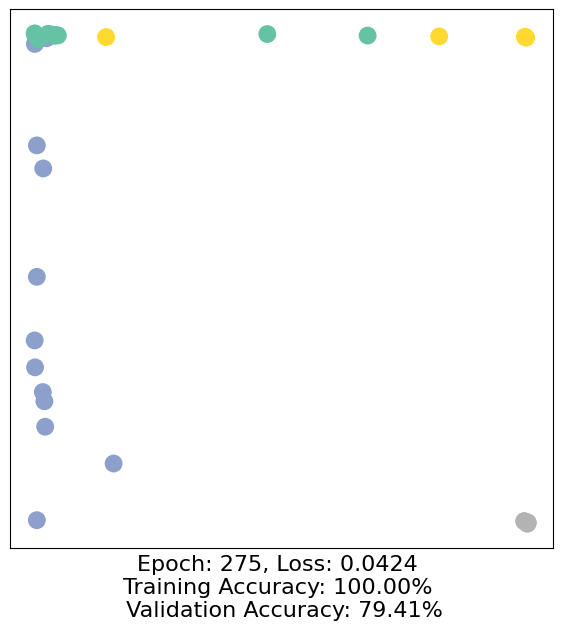

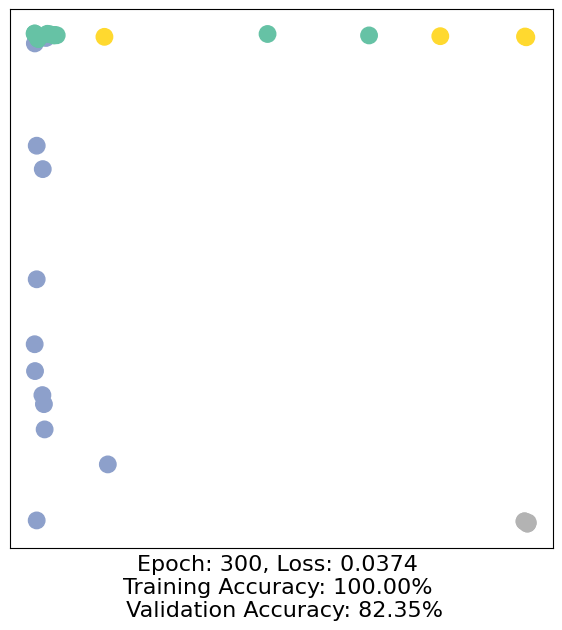

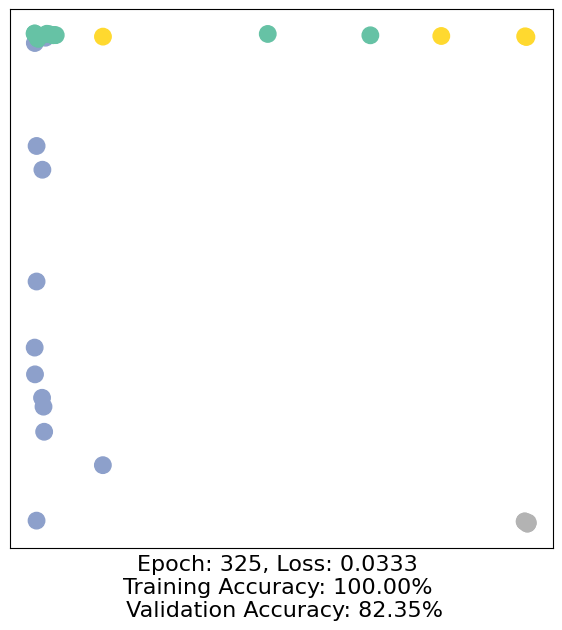

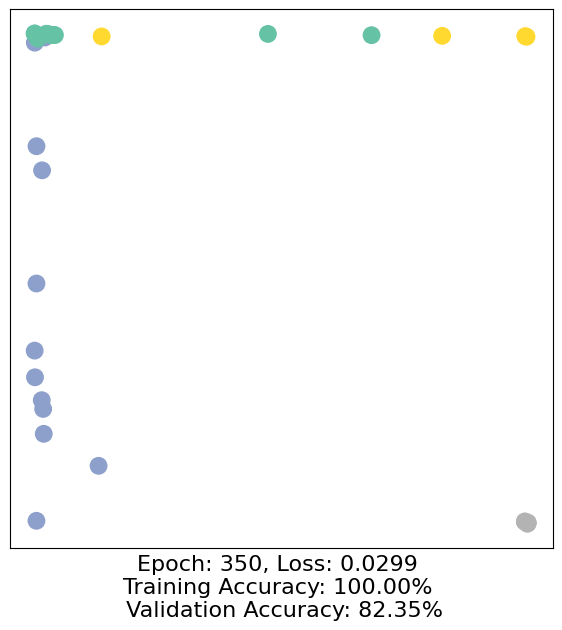

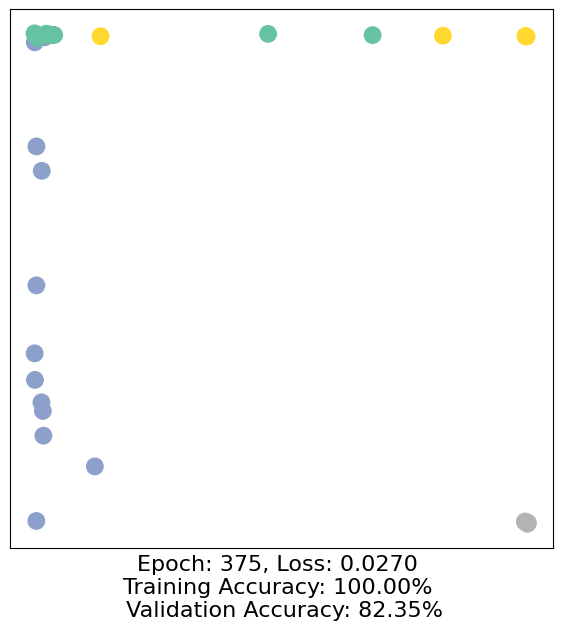

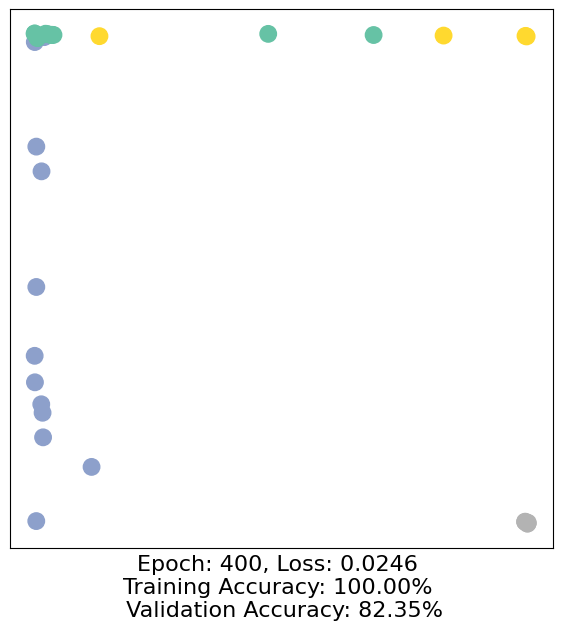

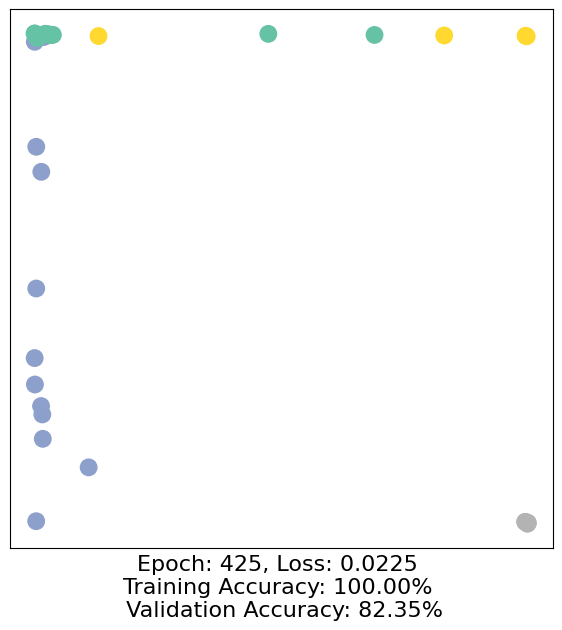

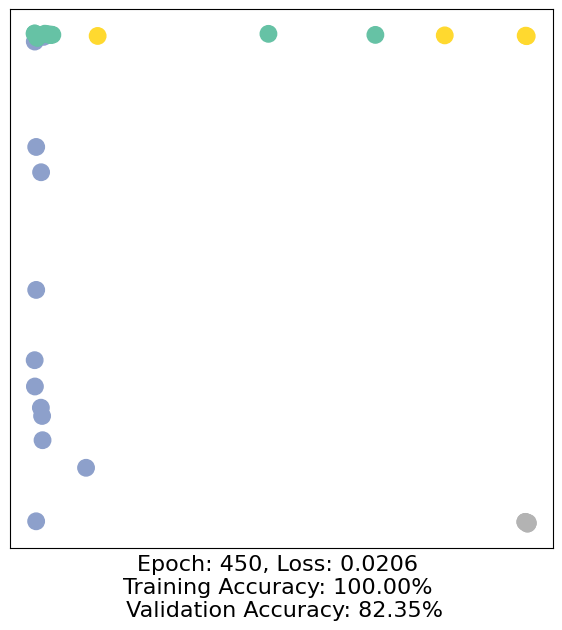

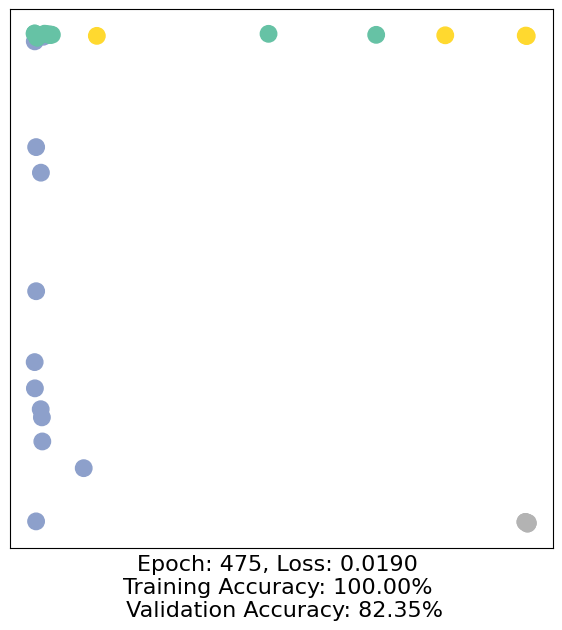

In [ ]:
#training :

import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

def train(data):
  optimizer.zero_grad()
  out, h = model(data.x, data.edge_index)
  loss = criterion(out[data.train_mask], data.y[data.train_mask])
  loss.backward()
  optimizer.step()

  accuracy  = {}
  #accuracy on 4 nodes
  predicted_classes = torch.argmax(out[data.train_mask], axis = 1)
  target_classes = data.y[data.train_mask]
  accuracy['train'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

  #prediction accuracy
  predicted_classes = torch.argmax(out, axis = 1)
  target_classes = data.y
  accuracy['val'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

  return loss, h, accuracy

for epoch in range(500):
  loss, h, accuracy = train(data)
  if epoch % 25 == 0:
      visualize(h, color=data.y, epoch=epoch, loss=loss, accuracy=accuracy)
      time.sleep(0.3)
